Example of double-pendulum chaotic system

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import dp_hamiltonian as dph

g = 9.81  # Gravitational acceleration
m1 = 1.0  # Mass of bob #1
m2 = 1.0  # Mass of bob #2
w1 = 0.0  # Initial angular velocity of bob #1
w2 = 0.0  # Initial angular velocity of bob #2
L1 = 1.0  # Length of the rod for bob #1
L2 = 1.0  # Length of the rod for bob #2

dt = 0.01 #simulation timestep
tnum = 100000 #number of steps
tmax = tnum*dt #time interval
t = np.arange(0,tmax,dt)


In [7]:
#instantiate Double-Pendulum object
t1 = 0.3*np.pi  # Initial angle of bob #1 (90 degrees)
t2 = 0.5*np.pi  # Initial angle of bob #2 (180 degrees)
theta = np.zeros((tnum,2))
pendulum = dph.DoublePendulumHamiltonian(g, m1, m2, t1, t2, w1, w2, L1, L2)

#Use built-in 4th order Runga Kutta simulator
for lp in range(tnum):
  theta[lp,:] = [pendulum.t1,pendulum.t2]
  pendulum.time_step(dt)

Early and Longterm Motion

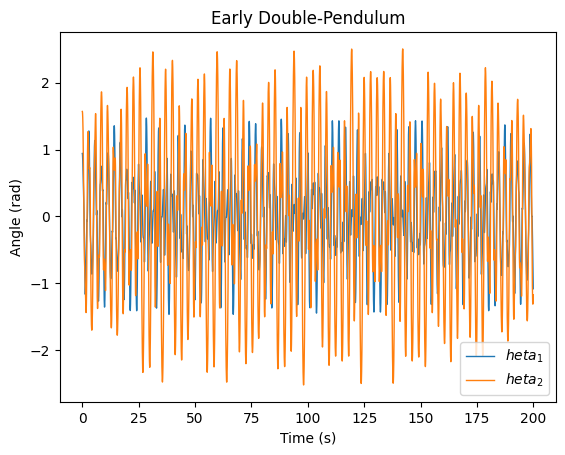

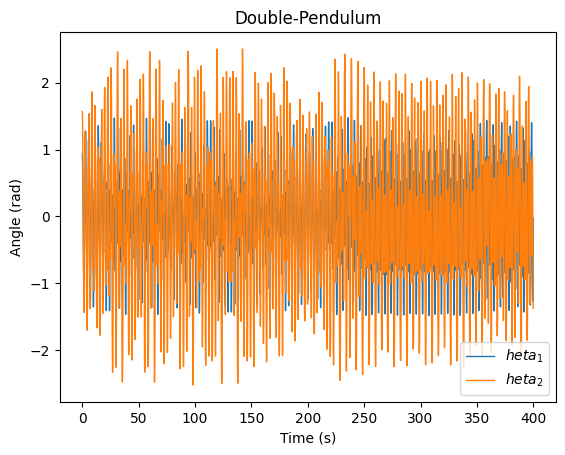

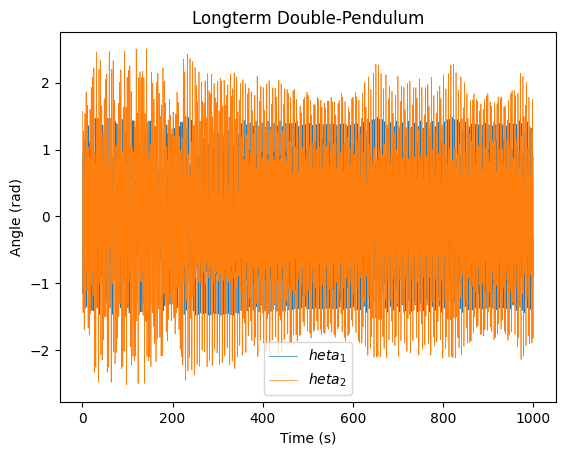

In [8]:
tplot1 = 20000
plt.plot(t[0:tplot1],theta[0:tplot1,0],linewidth=1,label='$\theta_{1}$')
plt.plot(t[0:tplot1],theta[0:tplot1,1],linewidth=1,label='$\theta_{2}$')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Early Double-Pendulum')
plt.legend()
plt.show()

tplot2 = 40000
plt.plot(t[0:tplot2],theta[0:tplot2,0],linewidth=1,label='$\theta_{1}$')
plt.plot(t[0:tplot2],theta[0:tplot2,1],linewidth=1,label='$\theta_{2}$')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Double-Pendulum')
plt.legend()
plt.show()

plt.plot(t[:],theta[:,0],linewidth=0.5,label='$\theta_{1}$')
plt.plot(t[:],theta[:,1],linewidth=0.5,label='$\theta_{2}$')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Longterm Double-Pendulum')
plt.legend()
plt.show()

Frequency Spectrum

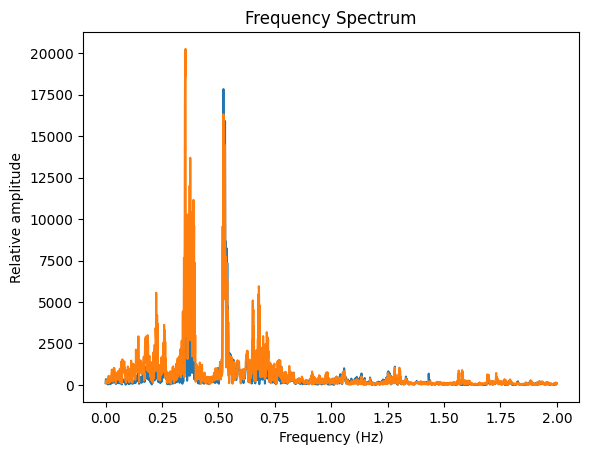

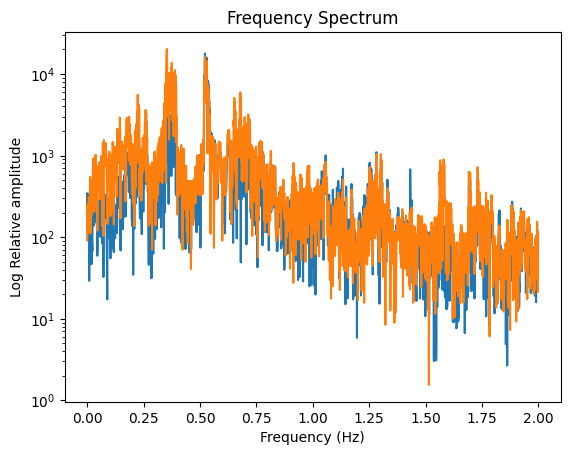

In [9]:
fplot=int(2*dt*tnum)
tnum2 = int(tnum/2)
freq = t[:tnum2]/(tmax*dt)
tnum2 = int(tnum/2)

plt.plot(freq[0:fplot],np.abs(np.fft.fft(theta[:,0]))[0:fplot],label='$\theta_{1}$')
plt.plot(freq[0:fplot],np.abs(np.fft.fft(theta[:,1]))[0:fplot],label='$\theta_{2}$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Relative amplitude')
plt.title('Frequency Spectrum')
plt.show()

plt.semilogy(freq[0:fplot],np.abs(np.fft.fft(theta[:,0]))[0:fplot],label='$\theta_{1}$')
plt.semilogy(freq[0:fplot],np.abs(np.fft.fft(theta[:,1]))[0:fplot],label='$\theta_{2}$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Relative amplitude')
plt.title('Frequency Spectrum')
plt.show()

Calculate tune diffusion chaos indicator

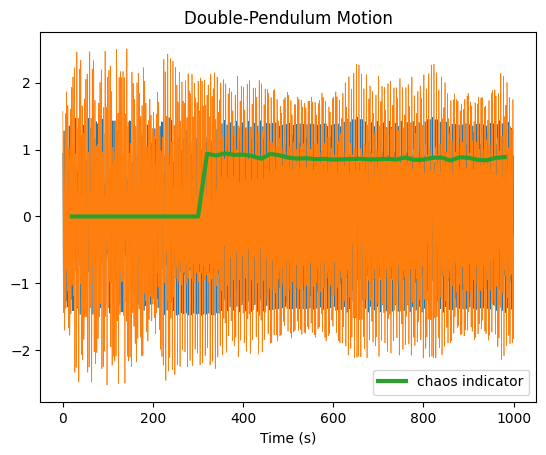

In [11]:
tstep = int(tnum2/50) #step for diffusion calculator
diff= []
diff_t =[]
for lpt in np.arange(tstep,tnum2,tstep):
  #first-half and second-half frequency theta 1
  f1 = np.abs(np.fft.fft(theta[0:lpt,0]))
  f2 = np.abs(np.fft.fft(theta[lpt:(2*lpt),0]))
  freq = t[:lpt]/(lpt*(dt*2))
  lpt2 = int(lpt/2)
  #find peak frequency of first-half and second-half
  nu_i = freq[np.argmax(f1[0:lpt2])]
  nu_f = freq[np.argmax(f2[0:lpt2])]
  #calculate difference
  diff.append(nu_f-nu_i)
  diff_t.append(2*lpt*dt)

diff = np.array(diff)
diff_t = np.array(diff_t)

plt.plot(t,theta[0:,0],linewidth=0.5)
plt.plot(t,theta[0:,1],linewidth=0.5)
plt.plot(diff_t,1000*diff,linewidth=3,label='chaos indicator')
plt.xlabel('Time (s)')
plt.title('Double-Pendulum Motion')
plt.legend()
plt.show()